# **DATA ANALYSIS - "PICK_DATA"**

## Packages

### Installing packages

In [1]:
# !pip3 install numpy
# !pip3 install --upgrade pip
# !pip3 install pandas
# !pip3 install matplotlib
# ! pip3 install seaborn

### Importing packages

In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Functions

Function that returns an overview of the **pick_data** based on all columns

In [3]:
# function that returns an overview of the pick_data based on all columns
def general_overview(pick_data):

    #get unique values for each variable
    unique_number_of_products = len(set(pick_data.product_id.values))
    unique_number_of_categories = len(set(pick_data.category.values))
    unique_number_of_source_order_ids = len(set(pick_data.source_order_id.values))
    unique_number_of_order_numbers = len(set(pick_data.order_number.values))
    unique_number_of_positions_in_order = len(set(pick_data.position_in_order.values))
    unique_number_of_quantity_unit = len(set(pick_data.quantity_unit.values))

    # print the results for a better understanding
    print("The length of the data is: ", len(pick_data))
    print("-----")
    print("-----")
    print("product_id")
    print("The number of unique product_id is: ",  unique_number_of_products)
    print("-----")
    print("category")
    print("The number of unique category is: ", unique_number_of_categories)
    print("-----")
    print("source_order_id")
    print("The number of unique source_order_id is: ", unique_number_of_source_order_ids)
    print("-----")
    print("order_number")
    print("The number of unique order_number is: ", unique_number_of_order_numbers)
    print("-----")
    print("position_in_order")
    print("The number of unique position_in_order is: ", unique_number_of_positions_in_order)
    print("-----")
    print("pick_volume")
    print("The min value of pick_volume is: ", pick_data.pick_volume.min())
    print("The max value of pick_volume is: ", pick_data.pick_volume.max())
    print("-----")
    print("quantity_unit")
    print("The number of unique quantity_unit is: ", unique_number_of_quantity_unit)
    print("-----")
    print("date_time")
    print("The first date_time of the picks_data is: ", pick_data.date_time.min())
    print("The last date_time of the picks_data is: ", pick_data.date_time.max())

Function that checks duplicate rows showing their duplicated partners based on a column selection

In [4]:
def check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate):

    index_row_pick_data = pick_data.loc[index_to_check, columns_to_evaluate]

    matching_rows = pick_data[pick_data[columns_to_evaluate].eq(index_row_pick_data).all(axis=1)]
    
    return(matching_rows)

Function that checks if integer list is sequential

In [5]:
def is_sequential(int_list):
    # Sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # Check if each consecutive number differs by 1
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            return False

    return True

Function that counts the number of times a list is not sequential

In [6]:
def count_non_sequential(int_list):
    # Sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # Initialize a counter for non-sequential occurrences
    non_sequential_count = 0

    # Check each consecutive number
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            non_sequential_count += 1

    return non_sequential_count

Function that identifies the **outliers** in **product_id** taking parameters **Q1**, **Q3**

In [7]:
def product_id_volume_outliers(Q1, Q3, df, product_id):
    
    pick_data_volume_evaluation = df.copy()
    pick_data_volume_evaluation = pick_data_volume_evaluation[pick_data_volume_evaluation["product_id"] == product_id]
    pick_data_volume_evaluation = pick_data_volume_evaluation.reset_index(drop=True)

    Q1 = pick_data_volume_evaluation['pick_volume'].quantile(Q1)
    Q3 = pick_data_volume_evaluation['pick_volume'].quantile(Q3)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    # lower_bound = Q1 - 1.5 * IQR
    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound, upper_bound)

    # Identify outliers
    outliers = pick_data_volume_evaluation[(pick_data_volume_evaluation["pick_volume"] < lower_bound) | (pick_data_volume_evaluation["pick_volume"] > upper_bound)]

    return outliers 

## Importing data (E)

### Importing data

In [8]:
# read cvs pick_data file
pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_11614/757817874.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)


Head of data

In [9]:
# print head of data
pick_data.head()

,0,1,2,3,4,5,6,7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


### Matching PBI Schema

Specify columns names

In [10]:
# rename columns of data to match schema
pick_data.columns = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

Check applied changes

In [11]:
# check head of data to see if columns match
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


Matching data types

In [12]:
# assign data types to pick_data to match schema
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

In [13]:
# check head of data to evaluate if any change damaged pick_data
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


In [14]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


### Data description

General information

In [15]:
# check all data types before data manipulation
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


## Data manipulation (T)

### Data homogeneity

#### General analysis

General view

In [16]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  -2000
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


#### Specific analysis

##### category

Check if products come from the same category everytime

In [17]:
# check data in category
print(set(pick_data.category.values))

{'AKL', 'SHL', 'HRL', 'Manuell', 'Kabellager'}


In [18]:
# create set of product_id values from each category
HRL_product_id_set = list(set(x for x in pick_data[pick_data["category"]=="HRL"]["product_id"].values))
SHL_product_id_set = list(set(x for x in pick_data[pick_data["category"]=="SHL"]["product_id"].values))
Kabellager_product_id_set = list(set(x for x in pick_data[pick_data["category"]=="Kabellager"]["product_id"].values))
AKL_product_id_set = list(set(x for x in pick_data[pick_data["category"]=="AKL"]["product_id"].values))
Manuell_product_id_set = list(set(x for x in pick_data[pick_data["category"]=="Manuell"]["product_id"].values))

In [19]:
# common_values_HRL_SHL = [x for x in HRL_product_id_set if x in SHL_product_id_set]
# print(len(HRL_product_id_set), len(SHL_product_id_set), len(common_values_HRL_SHL))
# common_values_HRL_Kabellager = [x for x in HRL_product_id_set if x in Kabellager_product_id_set]
# print(len(HRL_product_id_set), len(Kabellager_product_id_set), len(common_values_HRL_Kabellager))
# common_values_HRL_AKL = [x for x in HRL_product_id_set if x in AKL_product_id_set]
# print(len(HRL_product_id_set), len(AKL_product_id_set), len(common_values_HRL_AKL))
common_values_HRL_Manuell = [x for x in HRL_product_id_set if x in Manuell_product_id_set]
print(len(HRL_product_id_set), len(SHL_product_id_set), len(common_values_HRL_Manuell))

11324 61889 178


* Same **product_id** values can be picked from **different category** values

##### source_order_id

In [20]:
# check data in source_order_id
print(set(pick_data.source_order_id.values))

{'48', '46'}


##### quantity_unit

In [21]:
# check data in source_order_id
print(set(pick_data.quantity_unit.values))

{'St', 'Pa', 'Ro', 'Bl', 'kg', 'Se', 'Mt', 'Ei', 'VE'}


##### position_in_order

In [22]:
# check data in position_in_order
position_in_order_set_list = list(set([int(x) for x in pick_data.position_in_order.values]))
print(position_in_order_set_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

* **position_in_order** seems to be **semi-continous** so it's a good idea to check some examples of how that variable behaviors in some **order_number** cases

> We proceed to theck the behavior of the variable **position_in_order** within a giving **order_number**

Check if **position_in_order** is a continues sequence from **1** to **n**

In [23]:
# check random order_number with position_in_order > 10
random_position = pick_data[pick_data["position_in_order"] > 10].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
17610371,C11372,HRL,48,6183218,1,1,St,2013-06-18 12:13:09
11361968,H83143,SHL,48,6183218,1,100,St,2017-01-16 23:34:42
11388443,H83162,SHL,48,6183218,2,20,St,2017-01-16 23:38:51
11377394,H83153,SHL,48,6183218,3,40,St,2017-01-16 23:38:51
9509488,D64083,SHL,48,6183218,4,20,St,2017-01-16 23:38:51
7527102,387123,SHL,48,6183218,5,10,St,2017-01-16 23:40:50
7527101,387123,SHL,48,6183218,5,30,St,2017-01-16 23:38:51
9502383,D64020,SHL,48,6183218,6,20,St,2017-01-16 23:40:50
9515406,D64148,SHL,48,6183218,7,20,St,2017-01-16 23:40:50
9522545,D64155,SHL,48,6183218,8,20,St,2017-01-16 23:40:50


In [24]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  18
Number of breaks:  0
The order_number:  6183218  IS sequential


In [25]:
# check random order_number with position_in_order > 100
random_position = pick_data[pick_data["position_in_order"] > 100].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
12907448,P55411,SHL,48,8354692,1,1,St,2018-02-26 12:47:09
10757759,G92344,SHL,48,8354692,2,25,St,2018-02-26 11:11:21
3991125,231575,SHL,48,8354692,3,1,Ro,2018-02-26 11:11:21
2514264,206186,SHL,48,8354692,4,50,St,2018-02-26 11:11:21
12040528,J51130,SHL,48,8354692,5,1,St,2018-02-26 11:11:21
...,...,...,...,...,...,...,...,...
6660170,330281,SHL,48,8354692,122,10,St,2018-02-26 12:47:06
12070304,J85125,SHL,48,8354692,123,1,St,2018-02-26 10:38:24
13416259,R12000,SHL,48,8354692,124,3,St,2018-02-26 10:38:23
11429498,H90615,SHL,48,8354692,125,8,St,2018-02-26 10:38:23


In [26]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  126
Number of breaks:  0
The order_number:  8354692  IS sequential


In [27]:
# check random order_number with position_in_order > 200
random_position = pick_data[pick_data["position_in_order"] > 200].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
14240256,T52786,SHL,48,5785750,1,20,St,2018-07-24 05:57:32
5274918,250252,SHL,48,5785750,2,10,St,2018-07-24 05:57:32
5274920,250252,SHL,48,5785750,2,50,St,2018-07-24 06:01:10
5274911,250252,SHL,48,5785750,2,45,St,2018-07-24 05:44:44
5274912,250252,SHL,48,5785750,2,50,St,2018-07-24 05:44:55
...,...,...,...,...,...,...,...,...
14446348,T95131,SHL,48,5785750,227,1,St,2018-07-24 07:26:23
14430586,T95020,SHL,48,5785750,228,1,St,2018-07-24 07:26:23
8921694,A96931,SHL,48,5785750,229,1,St,2018-07-24 07:26:23
14446882,T95202,SHL,48,5785750,230,1,St,2018-07-24 07:26:23


In [28]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  231
Number of breaks:  0
The order_number:  5785750  IS sequential


In [29]:
# check random order_number with position_in_order > 250
random_position = pick_data[pick_data["position_in_order"] > 250].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
12598774,O63054,SHL,48,7465236,1,25,St,2017-09-19 07:32:54
8653443,A18059,SHL,48,7465236,2,6,St,2017-09-19 07:32:54
12599655,O63196,SHL,48,7465236,3,7,St,2017-09-19 07:31:42
12599656,O63196,SHL,48,7465236,3,4,St,2017-09-19 07:32:54
10959615,H48306,SHL,48,7465236,4,9,St,2017-09-19 07:31:42
...,...,...,...,...,...,...,...,...
8656549,A19012,SHL,48,7465236,277,1,St,2017-09-19 07:15:13
8832909,A79299,SHL,48,7465236,278,1,St,2017-09-19 08:25:11
11408870,H83448,SHL,48,7465236,279,1,St,2017-09-19 07:15:13
8657136,A19372,SHL,48,7465236,280,1,St,2017-09-19 08:25:11


In [30]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  281
Number of breaks:  0
The order_number:  7465236  IS sequential


In [31]:
# check random order_number with position_in_order > 300
random_position = pick_data[pick_data["position_in_order"] > 300].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
13204980,P90454,SHL,48,7107682,1,67,St,2017-07-11 11:29:34
13204979,P90454,SHL,48,7107682,1,80,St,2017-07-11 11:22:26
16117697,P99724,Manuell,48,7107682,1,42,Mt,2013-12-17 00:37:01
13204964,P90450,AKL,48,7107682,2,14,St,2017-07-11 12:25:34
16117889,Q01195,AKL,48,7107682,2,10,St,2013-12-17 02:08:48
...,...,...,...,...,...,...,...,...
8612396,A05051,SHL,48,7107682,335,10,St,2017-07-11 12:20:42
13207274,P90522,SHL,48,7107682,336,1,St,2017-07-11 14:09:08
9242370,C13855,SHL,48,7107682,338,2,St,2017-07-11 14:12:06
13212735,P90889,SHL,48,7107682,339,1,St,2017-07-11 14:09:08


In [32]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  340
Number of breaks:  2
The order_number:  7107682  IS NOT sequential


In [33]:
# check random order_number with position_in_order > 400
random_position = pick_data[pick_data["position_in_order"] > 400].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
16067218,S04220,AKL,46,7140205,1,2,St,2013-12-27 04:21:27
10476032,G41665,SHL,48,7140205,1,134,St,2017-07-17 15:14:29
10393501,G41650,SHL,48,7140205,2,5,St,2017-07-17 15:14:29
10393500,G41650,HRL,48,7140205,2,160,St,2017-07-17 14:59:04
4918876,243603,SHL,48,7140205,3,12,St,2017-07-17 15:22:12
4918875,243603,SHL,48,7140205,3,70,St,2017-07-17 15:11:00
10585391,G41816,SHL,48,7140205,4,86,St,2017-07-17 15:22:12
10631239,G42023,SHL,48,7140205,5,1,St,2017-07-17 15:45:14
10631238,G42023,SHL,48,7140205,5,60,St,2017-07-17 15:22:12
4963528,243609,SHL,48,7140205,6,61,St,2017-07-17 15:45:14


In [34]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  436
Number of breaks:  10
The order_number:  7140205  IS NOT sequential


> From the previous analysis we can check different things:

    1) The grater the max position_in_order, the more number of breaks in the the sequence of the   variable (1; n)

    2) We have to evaluate what to do with this order_number, since they could damage future analysis because of the breakes in the sequence

### Missing values

Checking misiing values over all columns

In [35]:
# check count of missing values for each variable 
pick_data.isna().sum()

product_id           0
category             0
source_order_id      0
order_number         0
position_in_order    0
pick_volume          0
quantity_unit        0
date_time            0
dtype: int64

* Since there are no missing values, we can assume that the data is complete and we can proceed to validate the consistency of the variables

### Duplicates

#### General analysis

Check duplicates based on **all columns**

In [36]:
# get duplicates dataframe over the all columns
duplicates_pick_date = pick_data.duplicated(subset = list(pick_data.columns))
pick_data[duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40
68,12,AKL,48,8197426,3,4,St,2018-01-30 12:55:47
626,99,SHL,48,3302027,1,4,St,2020-07-14 07:00:04
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42
1998,384,SHL,48,1854647,1,1,St,2019-10-23 10:55:28


Get total length of perfect matches

In [37]:
# get the count of duplicated values
print(len(pick_data[duplicates_pick_date]))

8024


* We see that **8.024** rows are duplicates evaluating **all columns**

#### Specific analysis

Check one duplicate example based on **all** column before taking any decission

In [38]:
# check the duplicated cases for row 14 over all columns (because we saw the indexin the previous output)
index_to_check = 1327
columns_to_evaluate = list(pick_data.columns)

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
1326,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42


* This is one of the **8.024** cases where registers are **exactly the same**

> Comparing this register with another register that doesn't follow this behavior

Getting registers **outside** the behavior of perfect duplicates

In [39]:
pick_data[~duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


Check one **orde_number** that is **outside** the behavior of perfect duplicates

In [40]:
pick_data[pick_data["order_number"]=="7055448"].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


* We see the **picks** are placed in a way that **date_time** and **pick_volume** could actually **overlap** within an **order_number**

> **Not recommendable to drop duplicates for several reasons:**

    1) We don't have a unique ID for pick_data, wich makes it difficult to make decissions over duplicates

    2) Orders are placed in a way that date_time and pick_volme can overlap within an order_number

### Outliers

#### Idenfy outliers

> For outliers identification we need to understand the variable where they could be

Overview of pick_data 

In [41]:
# checking structure of data
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


In [42]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  -2000
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


In [43]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


* We are going to execute the outlier identification over all **integer** variables:

    1) **pick_volume**
    2) **position_in_order**

> **pick_volume** has to be evaluated by product

> **position_in_order** was already evaluated in *data homogeneity*

###### pick_volume

Check value ranges over **all** the dataframe

In [44]:
print(pick_data["pick_volume"].min())
print(pick_data["pick_volume"].max())

-2000
200000


* The range in **pick_volumne** has to be equal or greater than 1 

Check the dataframe filtered by **undesired pick_volume range**

In [45]:
pick_data[pick_data["pick_volume"]<=0]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
107,32,AKL,48,6183218,18,0,St,2017-01-17 00:32:10
115,32,AKL,48,6183218,18,0,St,2017-01-17 00:35:46
465,77,AKL,48,7746735,3,0,St,2017-11-08 22:43:16
678,104,AKL,48,8221188,2,0,St,2018-02-01 21:34:15
682,104,AKL,48,8221188,2,0,St,2018-02-01 21:44:30
...,...,...,...,...,...,...,...,...
33875618,361725,HRL,46,6100367,3,0,St,2016-12-27 05:35:49
33875708,F23374,AKL,46,6100489,1,0,St,2016-12-27 05:42:42
33875866,392445,AKL,46,6105118,3,0,Pa,2016-12-28 22:28:11
33879292,855802,AKL,48,4170783,4,0,St,2016-12-29 17:08:01


* There are **190.371 registers** that are **adding noise** to the dataframe

Drop 190.371 registers (see above)

In [46]:
pick_data = pick_data[pick_data["pick_volume"]>0].reset_index(drop=True)
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


In [47]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33698619
-----
-----
product_id
The number of unique product_id is:  97331
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6955927
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  1
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


Boxplot to evaluate frequency of pick_volume over **all data**

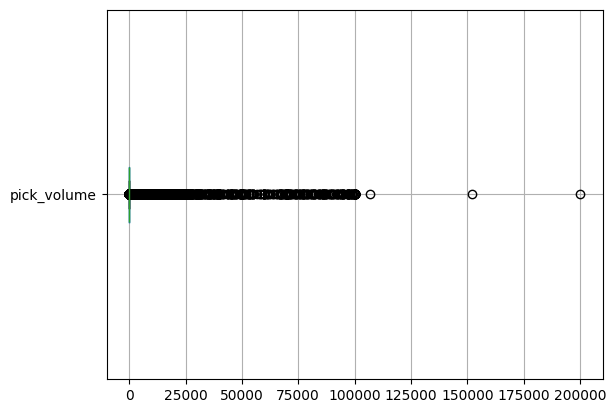

In [48]:
pick_volume_boxplot = pick_data.boxplot(column=['pick_volume'], vert = False)

Check highest **pick_volume** values

In [49]:
pick_data[pick_data["pick_volume"] > 25000]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
482740,109910,Kabellager,48,6230393,1,28800,Mt,2017-01-24 17:08:33
1115739,149942,Kabellager,48,9829275,1,26000,Mt,2019-04-25 17:03:41
2234387,204065,SHL,48,2483591,4,27000,St,2020-02-12 15:30:30
3069879,210650,HRL,46,6122279,1,27400,St,2017-01-04 10:51:01
3069887,210650,HRL,46,6148589,1,32400,St,2017-01-10 08:51:47
...,...,...,...,...,...,...,...,...
33031794,500103,HRL,46,3857499,1,50000,St,2016-11-02 08:15:33
33091011,500101,HRL,48,3888488,1,30000,St,2016-11-07 18:24:05
33332613,500100,HRL,48,4000255,1,100000,St,2016-11-24 17:42:09
33332715,500100,HRL,48,4000255,1,100000,St,2016-11-24 17:48:00


Check number of outliers from a **product_id**

In [50]:
product_id = "500103"

In [51]:
product_id_volume_outliers(0.05, 0.95, pick_data, product_id)

0 54999.99999999977


,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
7,500103,HRL,46,6377742,1,96000,St,2017-02-21 08:33:14
160,500103,HRL,48,7026218,1,97000,St,2017-06-26 17:05:54
168,500103,HRL,48,7981876,2,100000,St,2017-12-14 15:06:10
169,500103,HRL,48,7981876,2,70000,St,2017-12-14 15:27:34
360,500103,HRL,48,1170305,1,72000,St,2015-05-22 17:15:20


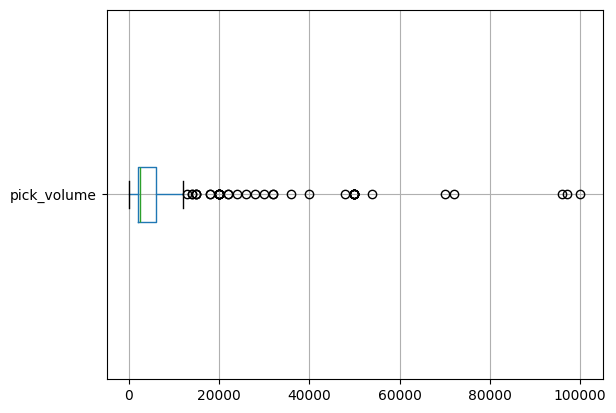

In [52]:
pick_data[pick_data["product_id"] == product_id].boxplot(column=['pick_volume'], vert = False)
plt.show()

Check order

In [53]:
pick_data[pick_data["order_number"] == "7981876"]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
8068147,500100,HRL,48,7981876,1,62000,St,2017-12-14 15:23:55
8068148,500100,HRL,48,7981876,1,11000,St,2017-12-14 15:36:51
8068149,500100,HRL,48,7981876,1,100000,St,2017-12-14 16:04:33
8068151,500100,HRL,48,7981876,1,27000,St,2017-12-14 23:20:15
8068694,500103,HRL,48,7981876,2,100000,St,2017-12-14 15:06:10
8068695,500103,HRL,48,7981876,2,70000,St,2017-12-14 15:27:34
8068696,500103,HRL,48,7981876,2,15000,St,2017-12-14 15:28:20
8068697,500103,HRL,48,7981876,2,15000,St,2017-12-14 23:23:46
23330127,O64386,AKL,48,7981876,1,1,St,2011-07-07 23:38:45
23333493,171861,HRL,48,7981876,5,1,St,2011-07-08 01:04:09


## Upload

Write csv file

In [55]:
pick_data.to_csv("pick_data_upload.csv", index=False)

Check that csv file is well written

In [57]:
pick_data_test = pd.read_csv("pick_data_upload.csv")
pick_data_test.head()

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_11614/4097477817.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data_test = pd.read_csv("pick_data_upload.csv")


,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02
